# DNNLikelihood tutorial 

## Initialize

In [1]:
import sys
sys.dont_write_bytecode = True
#sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev_old\source') #old
sys.path.append(r'C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\source') #new
import DNNLikelihood

from jupyterthemes import jtplot
jtplot.reset()

## Histfactory

In [2]:
histfact = DNNLikelihood.Histfactory(workspace_folder="../../tutorials/ATLAS/HEPData_workspaces",
                                     name = "ATLAS_sbottom_search",
                                     output_folder = "outfiles")

Successfully imported 649 likelihoods from 3 regions.
Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.pickle saved in 0.002142499999999714 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.json saved in 0.0011001000000003813 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.002486299999999275 s.


In [2]:
histfact = DNNLikelihood.Histfactory(input_file="outfiles/ATLAS_sbottom_search_histfactory")

Loaded likelihoods in 0.09907250000000012 seconds.
File size is  802001 .
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.json saved in 0.0009513999999999356 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.004429299999999969 s.


In [4]:
histfact_dict = list(histfact.__dict__.keys())
histfact_dict.sort()
histfact_dict

['bkg_files_base_name',
 'input_file',
 'input_json_file',
 'input_log_file',
 'input_pickle_file',
 'likelihoods_dict',
 'log',
 'name',
 'output_folder',
 'output_json_file',
 'output_log_file',
 'output_pickle_file',
 'patch_files_base_name',
 'regions',
 'regions_folders_base_name',
 'verbose',
 'workspace_folder']

In [5]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': False}

In [6]:
histfact.import_likelihoods(lik_numbers_list=[0],verbose=1)

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\ATLAS\HEPData_workspaces\RegionA\patch.sbottom_1000_131_1.json processed in 0.6949538000000004 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.002828600000000847 s.
Imported 1 likelihoods in  0.6951095999999986 s.


In [7]:
#histfact.import_likelihoods(lik_numbers_list=range(1,20),verbose=0)

In [8]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': True,
 'model': <pyhf.pdf.Model at 0x19c42c5ef88>,
 'obs_data': array([153.,  52.,  19.,  12.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.

In [10]:
histfact.save()

Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.pickle saved in 0.006900299999998083 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.json saved in 0.0008753000000005784 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_histfactory.log saved in 0.003712199999998944 s.


In [3]:
likelihood_0 = histfact.get_likelihood_object(lik_number=0)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.pickle saved in 0.1415027999999996 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.json saved in 0.0025617000000011103 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.log saved in 0.0010165000000004198 s.
Likelihood object for likelihood 0 created and saved to files C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.pickle ,  C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitH

## Likelihood

### Define likelihood function

In [2]:
import numpy as np

In [3]:
nbI_nominal = np.array(list(reversed([i for i in range(100,1100,100)])))
nbI_obs = np.random.poisson(nbI_nominal)
nsI_reference = np.array(list(reversed([i for i in range(10,110,10)])))
[len(nbI_nominal),len(nbI_obs),len(nsI_reference)]

[10, 10, 10]

In [4]:
def nbI(delta):
    delta = np.array(delta)
    return np.array([nbI_nominal[i]*(1+0.1)**delta[i] for i in range(len(delta))])
def nsI(mu):
    return mu*nsI_reference
def nI(pars):
    mu = pars[0]
    delta = pars[1:]
    return np.array(nsI(mu)+nbI(delta))
def loglik(pars, obs):
    exp = nI(pars)
    logfact = np.array(list(map(lambda x: np.math.lgamma(x+1), obs)))
    return np.sum(-1*logfact+obs*np.log(exp)-exp)
def logprior(pars):
    mu = pars[0]
    delta = pars[1:]
    delta_prior = -1/2*np.sum(delta**2+np.full(len(delta),np.log(2*np.pi)))
    return delta_prior-np.log(1/(10))
def logpdf(pars, obs):
    return loglik(pars, obs)+logprior(pars)

In [5]:
nbI(np.random.normal(0,1,10))

array([1043.40084285,  779.55681597,  950.5245536 ,  706.0426182 ,
        541.67703432,  490.04737002,  372.82734446,  302.66835323,
        185.85855436,   96.58763191])

In [6]:
nsI(1.1)

array([110.,  99.,  88.,  77.,  66.,  55.,  44.,  33.,  22.,  11.])

In [7]:
nI(np.insert(np.random.normal(0,1,10),0,1.1))

array([1095.35768557, 1085.66854905,  846.09741201,  783.73236478,
        699.59042896,  546.91012999,  461.86244271,  349.93266435,
        207.01819647,  112.59595821])

In [8]:
logpdf(np.insert(np.random.normal(0,1,10),0,1.1), nbI_obs)

-101.78652440847594

In [9]:
pars_pos_poi = [0]
pars_pos_nuis = range(1,11)
pars_init = np.insert(np.full(10,0),0,1)
pars_bounds = np.concatenate((np.array([[-5,5]]),
                              np.vstack([np.full(10,-np.inf),
                                         np.full(10,np.inf)]).T))

### Initialize Likelihood object

In [10]:
likelihood = DNNLikelihood.Likelihood(name = 'toy',
                                      logpdf = logpdf,
                                      logpdf_args = [nbI_obs],
                                      pars_pos_poi = pars_pos_poi,
                                      pars_pos_nuis = pars_pos_nuis,
                                      pars_init = pars_init,
                                      pars_labels = None,
                                      pars_bounds = pars_bounds,
                                      output_folder = "outfiles")

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.008877899999998107 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0014473999999999876 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010273000000005084 s.


In [11]:
likelihood = DNNLikelihood.Likelihood(input_file="outfiles/toy_likelihood")

Loaded likelihood in 0.006024899999999889 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0011559000000005426 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010002000000000066 s.


In [12]:
likelihood.logpdf_fn(likelihood.pars_init,*likelihood.logpdf_args)

-68.52552498668076

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_figure_par_0.pdf.


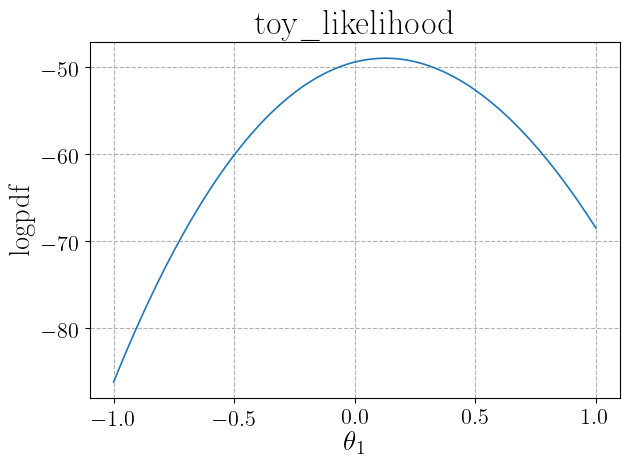

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_figure_par_5.pdf.


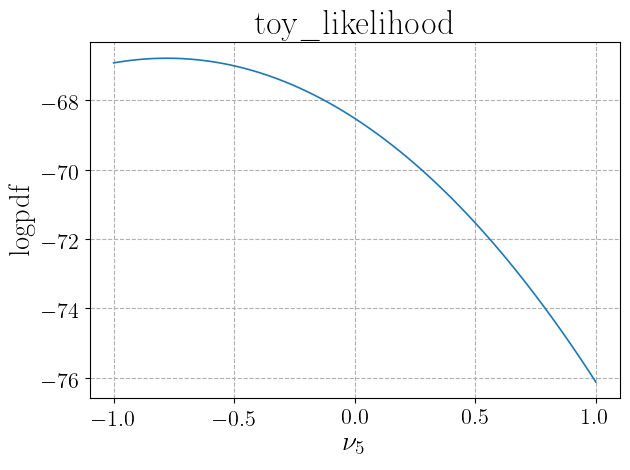

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0009370000000004097 s.


In [13]:
likelihood.plot_logpdf_par([[0,-1,1],[5,-1,1]],overwrite=True)

In [14]:
likelihood.compute_maximum_logpdf()
print(likelihood.X_logpdf_max)
print(likelihood.Y_logpdf_max)

Maximum likelihood computed in 0.02472749999999735 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0011006000000008953 s.
[ 0.12493439  0.16410468  0.22355357 -0.36219454 -0.28444832  0.00743576
  0.03005626  0.48360136 -0.17308301  0.01689154 -0.26196608]
47.10674990329736


In [15]:
likelihood.compute_profiled_maxima(pars=[0],pars_ranges=[[-1,1,50]],spacing="grid",verbose=2)
print(likelihood.X_prof_logpdf_max)
print(likelihood.Y_prof_logpdf_max)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 50 .
Log-pdf values lie in the range [ 47.10383337050092 , 51.93948897548601 ]
50 local maxima computed in 1.484527 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0016619000000019923 s.
[[-1.          1.1773499   1.22340931  0.66864819  0.7252768   0.97877719
   0.97518779  1.37176984  0.69114423  0.78467751  0.31334011]
 [-0.95918367  1.14181828  1.18829067  0.63236413  0.68964299  0.94439047
   0.94158572  1.34005488  0.65992292  0.75655884  0.29157508]
 [-0.91836735  1.10619483  1.15308517  0.59599213  0.65393317  0.9099372
   0.90792816  1.30829857  0.62869058  0.72844992  0.26987377]
 [-0.87755102  1.07047934  1.11779267  0.55953749  0.61814011  0.87541915
   0.87421768  1.27650059  0.59742709  0.70036029  0.2482408 ]
 [-0.83673469  1.03467163  1.08241303  0.52299829  0.58227322  0.84083484
   0.8404526   1.24466162  0.56615527  0.67228561  0.226

In [16]:
likelihood.save_script()

File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0010296000000025174 s.


In [17]:
likelihood.save(overwrite=True)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.008870500000000447 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003755600000005188 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.001217900000000327 s.


In [18]:
likelihood_attrs = list(likelihood.__dict__.keys())
likelihood_attrs.sort()
likelihood_attrs

['X_logpdf_max',
 'X_prof_logpdf_max',
 'X_prof_logpdf_max_tmp',
 'Y_logpdf_max',
 'Y_prof_logpdf_max',
 'Y_prof_logpdf_max_tmp',
 'figures_list',
 'generic_pars_labels',
 'input_file',
 'input_json_file',
 'input_log_file',
 'input_pickle_file',
 'log',
 'logpdf',
 'logpdf_args',
 'name',
 'ndims',
 'output_figures_base_file',
 'output_folder',
 'output_json_file',
 'output_log_file',
 'output_pickle_file',
 'pars_bounds',
 'pars_init',
 'pars_labels',
 'pars_pos_nuis',
 'pars_pos_poi',
 'script_file',
 'verbose']

## Sampler

### Make sampler from "likelihood"

In [2]:
likelihood = DNNLikelihood.Likelihood(input_file="outfiles/toy_likelihood")

Loaded likelihood in 0.006683899999998744 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0029687999999996606 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0014300000000009305 s.


In [3]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script.py",#None,#
                                 likelihood=likelihood,#None,#
                                 nsteps_final=1000,
                                 moves_str=None,#"[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file=None,
                                 verbose=1)

No moves_str parameter has been specified. moves has been set to the default StretchMove() of emcee.
File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0011285000000000878 s.
Loaded likelihood in 0.006003899999999618 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0034434000000000964 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.001413100000000611 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5

In [4]:
Sampler1.run_sampler(verbose=2)

Initial number of steps: 0 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.98it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0008811999999949194 s.
Done in 29.520045400000004 seconds.
Final number of steps: 1000. .


In [5]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script.py",#None,#
                                 likelihood=likelihood,#None,#
                                 nsteps_final=2000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file=None,
                                 verbose=1)

File C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood_script.py correctly generated.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.001412300000005473 s.
Loaded sampler in 0.00675189999999759 .
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 1000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.026857599999999593 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.json saved in 0.0010001000000059435 s.
Sampler log

In [6]:
Sampler2.new_sampler

False

In [7]:
Sampler2.run_sampler(verbose=2)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Initial number of steps: 1000 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.75it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0009311999999965792 s.
Done in 28.607359399999993 seconds.
Final number of steps: 2000. .


### Make sampler from "likelihood_script_file"

In [2]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file="outfiles/toy_likelihood_script",#None,#
                                 likelihood=None,#lik,#
                                 nsteps_final=1000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file=None,
                                 verbose=1)

Loaded likelihood in 0.007241100000001666 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0038026999999978273 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0016505999999978371 s.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Number of available steps: 0. .
Created backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.028256700000000023 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.json saved in 0.0013714000000000226 s.
Sampler log file C:\Users\Admin

In [3]:
Sampler1.run_sampler(verbose=2)

Initial number of steps: 0 .
Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0008944999999940251 s.
Done in 29.2076123 seconds.
Final number of steps: 1000. .


In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file="outfiles/toy_likelihood_script",#None,#
                                 likelihood=None,#lik,#
                                 nsteps_final=2000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file=None,
                                 verbose=1)

Loaded sampler in 0.0066240999999998 .
Loaded likelihood in 0.006486699999999956 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003573499999999896 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0019251000000011231 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 1000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02864849999999919 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfi

In [3]:
Sampler2.run_sampler()

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Initial number of steps: 1000 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.98it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0012220999999996707 s.
Done in 28.4417361 seconds.
Final number of steps: 2000. .


### Make sampler from "sampler_input_file"

In [2]:
Sampler1 = DNNLikelihood.Sampler(new_sampler=True,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",#
                                 likelihood=None,#lik,#
                                 nsteps_final=1000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded likelihood in 0.007459199999999555 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.00403200000000048 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0022546000000005506 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 already exists. Renaming the old file.
Initialize backend in file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Number of available steps: 0. .
Created backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.027123100000000733 s.
The file C:\Users\Admin\Dropbox

In [3]:
Sampler1.run_sampler()

Initial number of steps: 0 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:39<00:00, 75.95it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0009678000000121756 s.
Done in 54.669891899999996 seconds.
Final number of steps: 3000. .


In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=2000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.0008159000000009797 .
Loaded likelihood in 0.007354000000001193 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003716400000000064 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0025420000000000442 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 3000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02984410000000004 s.
Specified number of steps nsteps is inconsitent with loaded backend. nsteps has been set to 3000 .
Sampler json file C

In [4]:
Sampler2.run_sampler(verbose=2)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Initial number of steps: 3000 .
Running 44 parallel processes.


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.34it/s]


Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0010548999999997477 s.
Done in 28.1206246 seconds.
Final number of steps: 4000. .


In [5]:
[Sampler2.nsteps_final,Sampler2.nsteps_available]

[4000, 4000]

### Usage

In [3]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=50000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.005540000000001655 .
Loaded likelihood in 0.0059509999999995955 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.003387599999999935 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.003008600000001138 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 4000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.025811799999999607 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\ou

In [ ]:
Sampler2.run_sampler()

  0%|                                                                                        | 0/46000 [00:00<?, ?it/s]

Initial number of steps: 4000 .
Running 44 parallel processes.


 20%|███████████████▊                                                             | 9425/46000 [02:17<07:59, 76.28it/s]

In [ ]:
Sampler2.save(overwrite=True)

In [4]:
Sampler2.gelman_rubin(pars=[0,5],nsteps=[500,1000,5000,10000,50000])

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0016344000000003689 s.
Gelman-Rubin statistics for parameters [0 5] computed in 0.5192595000000004 s.


array([[0.00000000e+00, 5.00000000e+02, 1.85170914e+01, 3.53538175e-01,
        1.07204822e-03],
       [0.00000000e+00, 1.00000000e+03, 1.24512217e+01, 3.43942575e-01,
        2.30609463e-03],
       [0.00000000e+00, 4.00000000e+03, 6.78659125e+00, 3.13406221e-01,
        7.06505239e-03],
       [0.00000000e+00, 4.00000000e+03, 6.78659125e+00, 3.13406221e-01,
        7.06505239e-03],
       [0.00000000e+00, 4.00000000e+03, 6.78659125e+00, 3.13406221e-01,
        7.06505239e-03],
       [5.00000000e+00, 5.00000000e+02, 1.56932359e+01, 3.03247578e-01,
        1.28018606e-03],
       [5.00000000e+00, 1.00000000e+03, 1.07629703e+01, 3.14064341e-01,
        2.81778595e-03],
       [5.00000000e+00, 4.00000000e+03, 5.14362193e+00, 3.18052521e-01,
        1.24673392e-02],
       [5.00000000e+00, 4.00000000e+03, 5.14362193e+00, 3.18052521e-01,
        1.24673392e-02],
       [5.00000000e+00, 4.00000000e+03, 5.14362193e+00, 3.18052521e-01,
        1.24673392e-02]])

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0014046999999983711 s.
Gelman-Rubin statistics for parameters [0] computed in 0.4665955000000004 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_Rc_0.pdf.


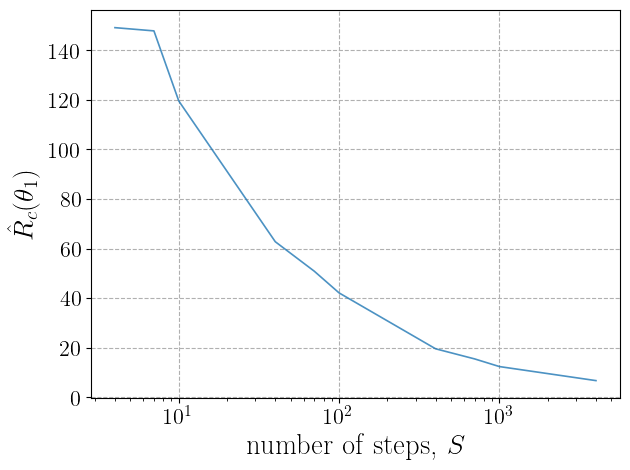

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtVhat_0.pdf.


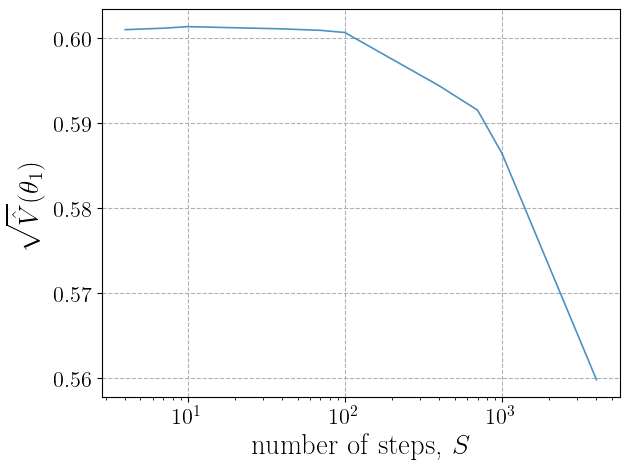

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtW_0.pdf.


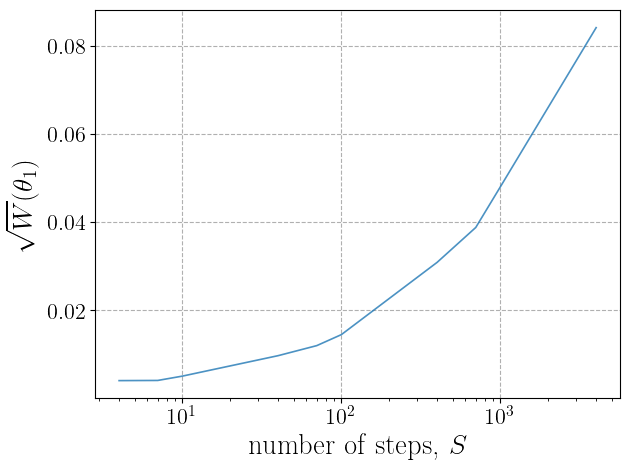

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0016463000000044303 s.
Gelman-Rubin statistics for parameters [5] computed in 0.4597562999999951 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_Rc_5.pdf.


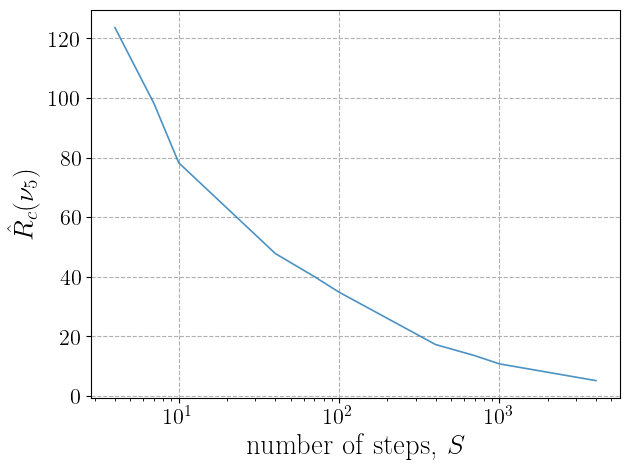

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtVhat_5.pdf.


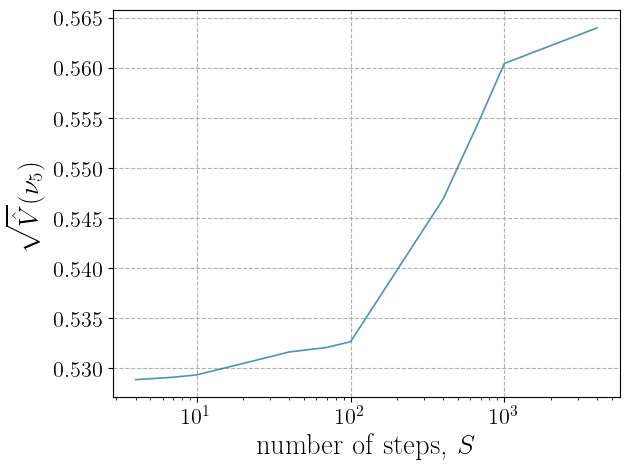

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_GR_sqrtW_5.pdf.


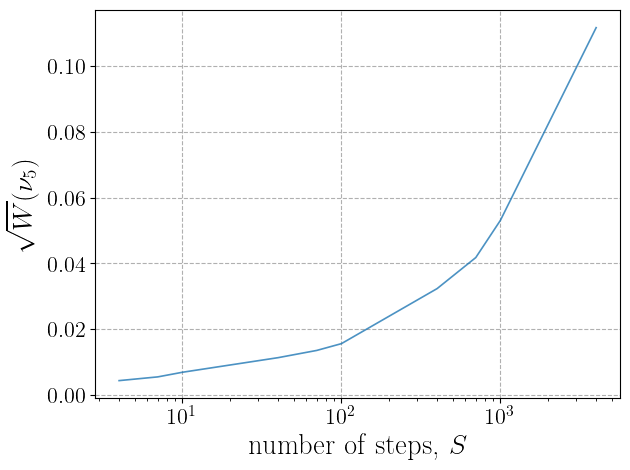

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0018115999999963606 s.


In [5]:
Sampler2.plot_gelman_rubin(pars=[0,5], npoints=10)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_distr_0.pdf.


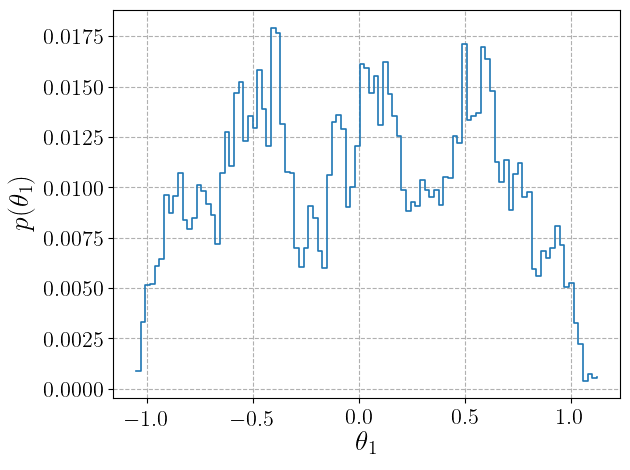

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_distr_5.pdf.


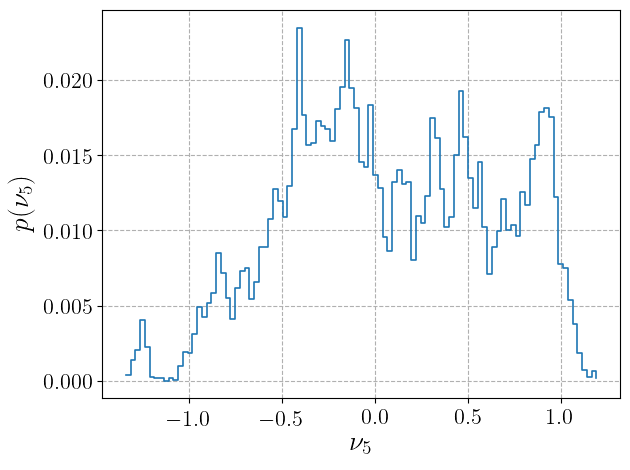

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0017522999999997069 s.


In [6]:
Sampler2.plot_dist(pars=[0,5])

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_autocorr_0.pdf.


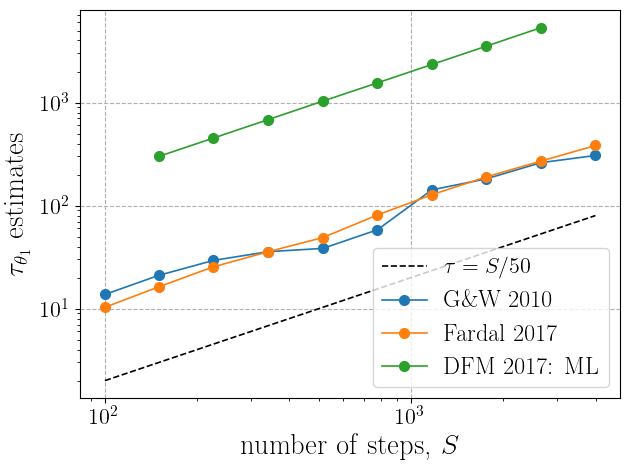

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_autocorr_5.pdf.


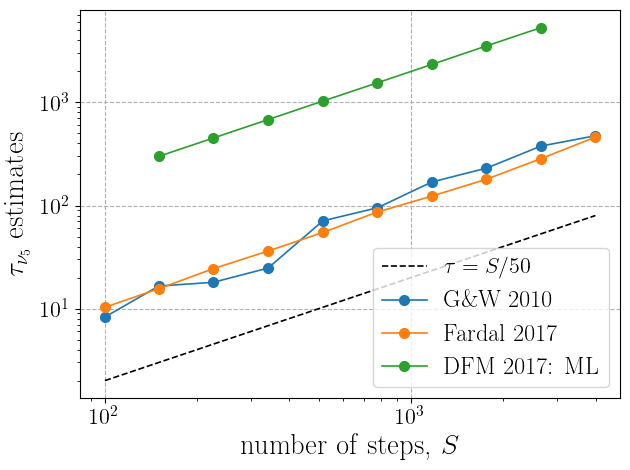

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0017030000000062273 s.


In [7]:
Sampler2.plot_autocorr(pars=[0,5])

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_0.pdf.


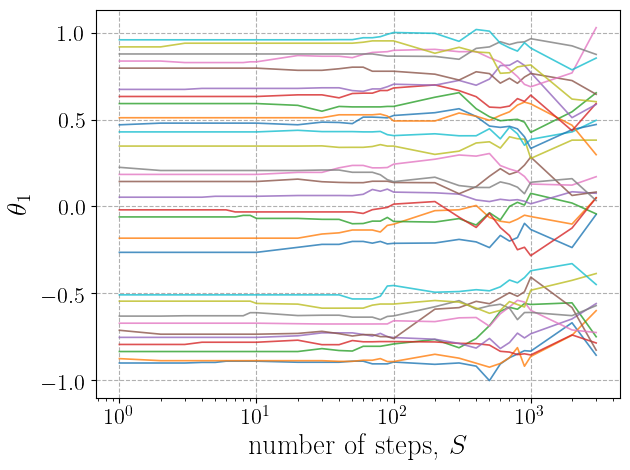

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_5.pdf.


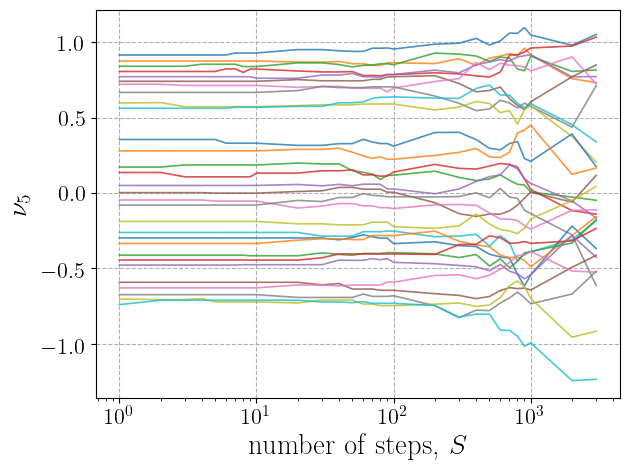

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.002236699999997427 s.


In [8]:
Sampler2.plot_chains(pars=[0,5],n_chains=30)

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_figure_chains_logpdf.pdf.


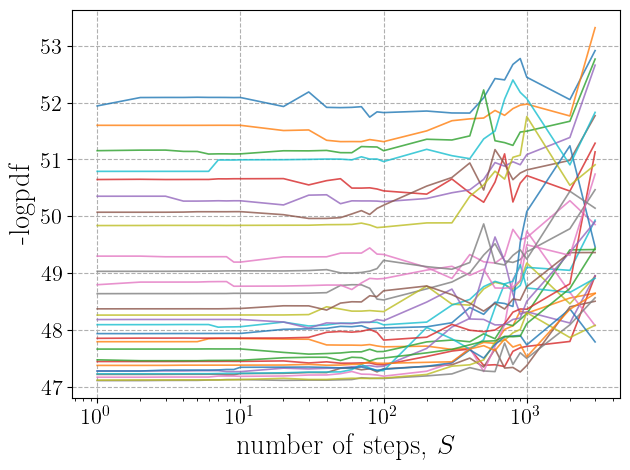

Sampler log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler.log saved in 0.0018465999999932592 s.


In [9]:
Sampler2.plot_chains_logpdf(n_chains=30)

In [10]:
[x.replace("C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\DNNLikelihood_dev\\tutorials\\toy\\outfiles","") for x in Sampler2.figures_list]

['\\toy_sampler_figure_GR_Rc_0.pdf',
 '\\toy_sampler_figure_GR_sqrtVhat_0.pdf',
 '\\toy_sampler_figure_GR_sqrtW_0.pdf',
 '\\toy_sampler_figure_GR_Rc_5.pdf',
 '\\toy_sampler_figure_GR_sqrtVhat_5.pdf',
 '\\toy_sampler_figure_GR_sqrtW_5.pdf',
 '\\toy_sampler_figure_distr_0.pdf',
 '\\toy_sampler_figure_distr_5.pdf',
 '\\toy_sampler_figure_autocorr_0.pdf',
 '\\toy_sampler_figure_autocorr_5.pdf',
 '\\toy_sampler_figure_chains_0.pdf',
 '\\toy_sampler_figure_chains_5.pdf',
 '\\toy_sampler_figure_chains_logpdf.pdf']

## Data

### Make data from sampler

In [2]:
Sampler2 = DNNLikelihood.Sampler(new_sampler=False,
                                 likelihood_script_file=None,#"outfiles/ATLAS_sbottom_search_92_region_A_patch_sbottom_1400_450_60_likelihood_script",
                                 likelihood=None,#lik,#
                                 nsteps_final=50000,
                                 moves_str="[(emcee.moves.StretchMove(), 0), (emcee.moves.GaussianMove(0.0002, mode='random',factor=None),1)]",
                                 parallel_CPU=True,
                                 vectorize=False,
                                 sampler_input_file="outfiles/toy_sampler",
                                 verbose=1)

Loaded sampler in 0.00667379999999973 .
Loaded likelihood in 0.006598299999998503 .
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0037161999999995032 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.004985200000000134 s.
Initialize backend from file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 .
Please increase nsteps to run for more steps
Number of available steps: 3000. .
Loaded backend C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_sampler_backend.h5 for chains toy_sampler in 0.02758880000000019 s.
Sampler json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outf

In [3]:
Sampler2.nsteps_available

3000

In [4]:
data = Sampler2.get_data_object(nsamples=10000, burnin=500, thin=2, dtype='float64', test_fraction=0)

Notice: When requiring an unbiased data sample please check that the required burnin is compatible with MCMC convergence.
There are non-unique samples
10000 unique samples generated in 0.03401589999999999 s.
Data json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.json saved in 0.4021858999999992 s.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log saved in 0.0006716999999980544 s.
Saved 10000 (data_X, data_Y) samples in data h5 file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.h5 in 0.003649100000000516 s.
The file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_data.log already exists. Renaming the old file.
Data log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelih

In [6]:
data_dic = list(data.__dict__.keys())
data_dic.sort()
data_dic

['data_X',
 'data_Y',
 'data_dictionary',
 'data_input_file',
 'data_input_h5_file',
 'data_input_json_file',
 'data_input_log_file',
 'data_output_h5_file',
 'data_output_json_file',
 'data_output_log_file',
 'dtype',
 'generic_pars_labels',
 'load_on_RAM',
 'log',
 'name',
 'ndims',
 'npoints',
 'output_folder',
 'pars_bounds',
 'pars_labels',
 'pars_pos_nuis',
 'pars_pos_poi',
 'test_fraction',
 'test_range',
 'train_range',
 'verbose']

In [9]:
str(data.data_X[0].dtype)

'float64'

## Debug sampler

In [1]:
import emcee
import importlib
import sys
from multiprocessing import Pool
import psutil

In [3]:
#sys.path.insert(0, "../../../DNNLikelihood_dev_old/tutorials/toy/outfiles")
sys.path.insert(0, "outfiles")
from toy_likelihood_script import *
#lik = importlib.import_module("toy_likelihood_script")
nwalkers = len(pars_init_vec)
ndims = len(pars_init_vec[0])
p0 = pars_init_vec
nsteps_to_run = 1000

new script
Loaded likelihood in 0.01065330000000042 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.0094776999999997 s.
Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.009904200000000252 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0038458000000005654 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.008868400000000776 s.


In [4]:
backend = emcee.backends.HDFBackend("outfiles/prova_backend", name="prova")
backend.reset(nwalkers, ndims)

In [5]:
n_processes = psutil.cpu_count(logical=False)
with Pool(n_processes) as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndims, logpdf, moves=emcee.moves.StretchMove(), pool=pool, backend=backend, args=logpdf_args)
    sampler.run_mcmc(p0, nsteps_to_run, progress=True, store = True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.97it/s]


In [2]:
sys.path.insert(0, "outfiles")
lik = importlib.import_module("toy_likelihood_script")
nwalkers = len(lik.pars_init_vec)
ndims = len(lik.pars_init_vec[0])
p0 = lik.pars_init_vec
nsteps_to_run = 1000

Likelihood loaded in 0.006819099999999523 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.002976900000000171 s.
Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.pickle saved in 0.00889080000000142 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.json saved in 0.0035337999999995873 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\DNNLikelihood_dev\tutorials\toy\outfiles\toy_likelihood.log saved in 0.00276430000000083 s.


In [3]:
backend = emcee.backends.HDFBackend("outfiles/prova_backend", name="prova")
backend.reset(nwalkers, ndims)

In [4]:
n_processes = psutil.cpu_count(logical=False)
with Pool(n_processes) as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndims, lik.logpdf, moves=emcee.moves.StretchMove(), pool=pool, backend=backend, args=lik.logpdf_args)
    sampler.run_mcmc(p0, nsteps_to_run, progress=True, store = True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.61it/s]
